# Programa Ingenias+ Data Science

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import sklearn

In [ ]:
# Chequeamos nuestra version
sklearn.__version__

'1.6.1'

Ya dijimos previamente que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En la clase anterior, hicimos el analisis exploratorio de los datos y pudimos observar el tipo de datos que teniamos. Pudimos hacernos preguntas y ver algunos patrones.

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [ ]:
# Leemos nuevamente los datos del blackfriday
blackfriday = pd.read_csv('https://raw.githubusercontent.com/micaelakorol21/datasets/refs/heads/main/train.csv')

In [ ]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### MANEJO DE DATOS FALTANTES 🚨

Primero, vamos a recordar si tenemos datos faltantes.

In [ ]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


¿Cuanto representa esos valores faltantes?

**¿Que debo preguntarme al manejar datos faltantes?**

- ¿Quiero conservar la información?
- ¿Qué tipo de datos tengo en la columna que voy a imputar?
- ¿Por qué puede ser que tengo los valores faltantes?:
    - Valores faltantes al azar
    - Valores faltantes no al azar
- Si es una variable numerica continua, ¿Que distribución tiene?

**¿Como decido que hago con los valores faltantes?**

- Entender que no hay una manera _perfecta_ de manejar los valores faltantes.

- Depende de mis datos

- Observar no solo la cantidad de datos faltantes sino también su patrón.

- Estrategias:  
     - **Eliminar los valores**:
        - Si la recogida de datos no se ha realizado de forma aleatoria introduce sesgo.  
        - En el caso de que haya mucho patrones con datos faltantes, podría reducir considerablemente la cantidad de filas disponibles.
     - **Eliminación de la variable (columna)**:
         - Las variables “descartadas” podrían contener información de vital importancia.      
     - **Imputar los valores**:
        - Sustituir por media o mediana: Solo en variables numericas  
        - Sustituir por valor mas frecuente: Util para variables categoricas
        - Algoritmo de ML: K-NN (k-nearest neighboors)

A) Si optamos por eliminar los datos, puedemos hacerlo usando la siguiente función:
    
`.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

- **axis**: {0, 1}, default 0. 0: Filas, 1: Columnas
- **how**: {'any', 'all'}, default 'any'. Any: Si hay un valor faltante elimina la columna o fila. All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
- **subset**: Nombre de filas o columnas donde buscar valores faltantes
- **inplace**: True modifica el DataFrame original

[documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
blackfriday_drop = blackfriday.dropna()

In [ ]:
blackfriday_drop.shape

(166821, 12)

In [ ]:
blackfriday.dropna(how='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
blackfriday.dropna(subset=['Gender'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
blackfriday.dropna(subset=['Age', 'Gender'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


B) Si optamos por imputar los datos, podemos hacerlo usando la siguiente función:
    
`sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, copy=True, add_indicator=False)`
    
- **missing_values**: Indica como son representados los valores faltantes (np.nan es el estandard)
- **strategy**: `mean`, `median`, `most_frequent`, `constant`.
- **fill_value**: Si uso `constant`, puedo usar `fill_value` para indicar por cuál valor debe ser reemplazado
- **copy**: Si pongo True, crea una copia de X
- **add_indicator**: Agrega un indicador para los valores faltantes.


[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [ ]:
from sklearn.impute import SimpleImputer

**Variable: `City_Category`**

<ipython-input-13-30b94a7a165c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=blackfriday, palette="Set3")


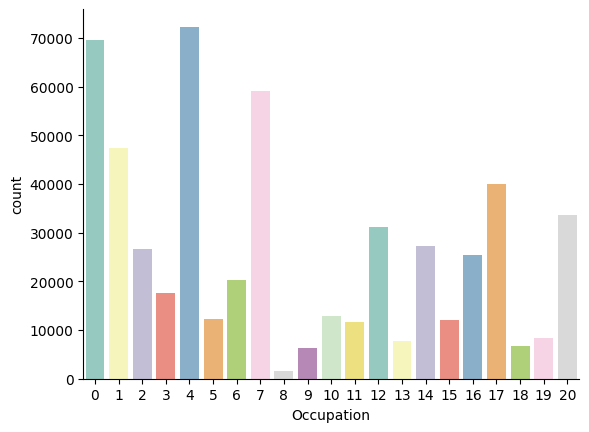

In [ ]:
sns.countplot(x="Occupation", data=blackfriday, palette="Set3")
sns.despine()

In [ ]:
blackfriday['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
blackfriday_imputados = imputer.fit_transform(blackfriday[['Occupation']])

In [ ]:
np.shape(blackfriday_imputados)

(550068, 1)

In [ ]:
blackfriday_imputados[:10]

array([[10],
       [10],
       [10],
       [10],
       [16],
       [15],
       [ 7],
       [ 7],
       [ 7],
       [20]])

In [ ]:
blackfriday["Occupation"] = blackfriday_imputados

In [ ]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
blackfriday['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


**Variable: `Age`**

In [ ]:
blackfriday['Age'].describe()

,Age
count,550068
unique,7
top,26-35
freq,219587


In [ ]:
blackfriday['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
imputer_age = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
# Convertir la columna 'Age' de string a entero
# Ver el tipo de dato de una columna específica
print(blackfriday['Age'].dtype)

object


In [ ]:
blackfriday['Age'].describe()

,Age
count,550068
unique,7
top,26-35
freq,219587


**Variable: `Gender`**

In [ ]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
imputer_gen = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [ ]:
blackfriday['Gender'] = imputer_gen.fit_transform(blackfriday[['Gender']])

ValueError: 2

In [ ]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


**Variable `Purchase`**

In [ ]:
blackfriday.dropna(subset=['Purchase'], inplace=True)

**Columnas `Product_Category_2` and `Product_Category_3`**

In [ ]:
blackfriday.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [ ]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Purchase,0


#### DETECCION DE OUTLIERS

- Manera de detectar outliers:
    - z-score
        - Considera que todo valor que se aleje mucho de la media=0 es un outlier.
        - Depende de la media y el desvio estandard para medir la centralidad y dispersión, los cuales son muy afectados por outliers. Si las variables no tiene una distribución normal, termino removiendo muchos outliers del dataset.
        - No funciona bien en dataset muy pequeños.
    - Rango Intercuartil:
        - Es robusto y no es tan sensible a outliers.

In [ ]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Purchase,int64


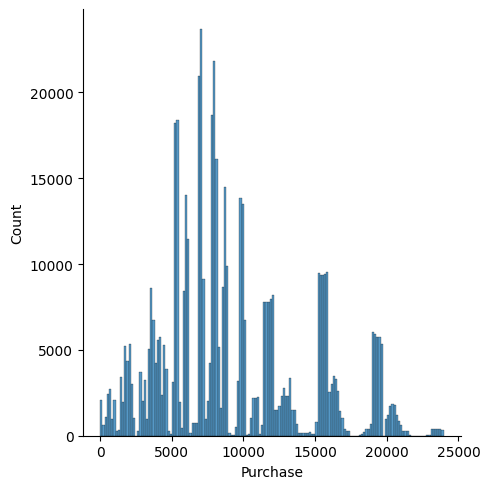

In [ ]:
sns.displot(blackfriday['Purchase'])
sns.despine()

In [ ]:
sns.barplot(blackfriday['Purchase'], color='#F5B041')
sns.despine()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a5e5c87f100> (for post_execute):


KeyboardInterrupt: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x7a5e5c87cae0> (for post_execute):
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py", line 126, in flush_figures
    return show(True)
           ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/decorator.py", line 235, in fun
    return caller(func

In [ ]:
z = stats.zscore(np.array(blackfriday['Purchase']))

In [ ]:
threshold = 2.5

In [ ]:
z_index = blackfriday['Purchase'][np.abs(z) < threshold].index

blackfriday_withzscore = blackfriday.loc[z_index]

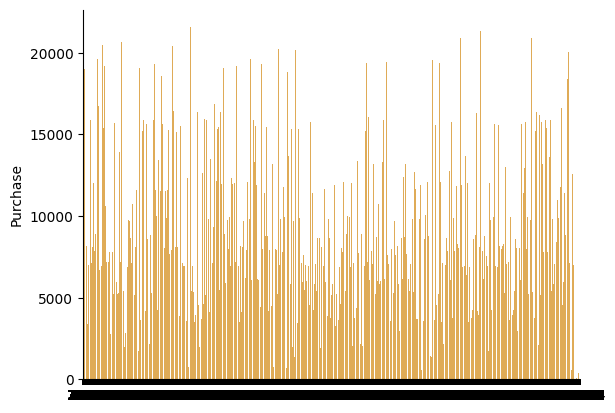

In [ ]:
sns.barplot(blackfriday_withzscore['Purchase'], color='#F5B041')
sns.despine()

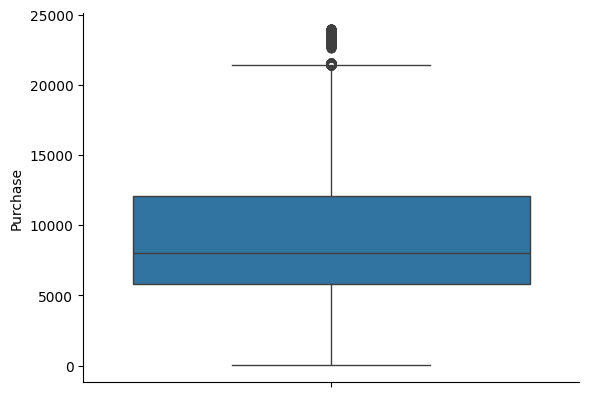

In [ ]:
sns.boxplot(blackfriday['Purchase'])
sns.despine()

In [ ]:
q1 = blackfriday['Purchase'].quantile(0.25)
q3 = blackfriday['Purchase'].quantile(0.75)

In [ ]:
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [ ]:
blackfriday = blackfriday[(blackfriday['Purchase'] > lb) & (blackfriday['Purchase'] < ub)]

In [ ]:
blackfriday.reset_index(drop=True, inplace=True)

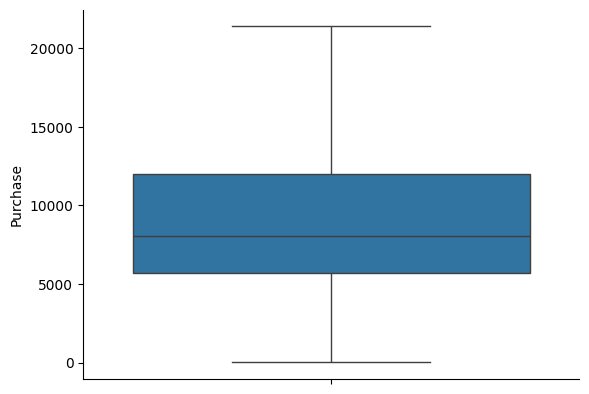

In [ ]:
sns.boxplot(blackfriday['Purchase'])
sns.despine()